<a href="https://colab.research.google.com/github/aton-of-data/twitter_sentiment_stock_prediction/blob/main/twitter_sentiment_stock_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# A Correlação Entre o Engajamento no Twitter e os Preços das Stocks

O mercado financeiro é um ecossistema complexo, onde uma infinidade de fatores influencia o comportamento dos preços das ações. Uma dessas influências, cada vez mais relevante na era digital, é o engajamento nas redes sociais, particularmente no Twitter. Neste artigo, exploraremos a correlação entre o engajamento de determinadas stocks no Twitter e seus preços reais, com base em dados históricos.

## Engajamento no Twitter e Preços das Ações

O Twitter é uma plataforma onde informações financeiras, análises e opiniões são compartilhadas instantaneamente. Muitos investidores e traders recorrem ao Twitter para obter insights sobre o mercado, além de compartilhar suas próprias análises e estratégias. O engajamento, medido por métricas como retweets, likes e respostas, pode refletir o interesse e a confiança dos investidores em determinadas ações.

## Correlação e Causalidade

É importante destacar que correlação não implica causalidade. Ou seja, apenas porque duas variáveis estão correlacionadas, não significa que uma causa a outra. No entanto, a identificação de uma correlação significativa pode fornecer insights valiosos e servir como base para investigações mais aprofundadas.

## Resultados e Implicações

Os resultados da análise podem variar dependendo do período de tempo e das ações específicas consideradas. É possível que algumas ações apresentem uma correlação mais forte com o engajamento no Twitter do que outras. Além disso, fatores externos, como eventos de mercado e notícias, também podem influenciar os preços das ações.

## Conclusão.

Este artigo destaca a complexidade e a interconexão de diferentes variáveis no mercado financeiro e destaca a importância de uma abordagem holística ao analisar o comportamento das ações.


## 1. Carregamento e sanitização

* Lê o arquivo CSV contendo dados de sentimentos.
* Armazena os dados em um DataFrame chamado sentiment_df.
* Converte a coluna 'date' para o tipo de dados datetime.
* Define o índice do DataFrame para ser uma combinação das colunas 'date' e 'symbol'.
* Cria uma nova coluna 'engagement_ratio'.
* Calcula a razão entre 'twitterComments' e 'twitterLikes'.
* Filtra o DataFrame para incluir apenas as linhas onde o número de 'twitterLikes' é maior que 20 e o número de 'twitterComments' é maior que 10.
* Remove entradas com pouco engajamento que podem não ser significativas.

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.ticker as mtick
import datetime as dt
import yfinance as yf

plt.style.use('ggplot')

sentiment_df = pd.read_csv('/home/sentiment_data.csv')

sentiment_df['date'] = pd.to_datetime(sentiment_df['date'])

sentiment_df = sentiment_df.set_index(['date', 'symbol'])

sentiment_df['engagement_ratio'] = sentiment_df['twitterComments']/sentiment_df['twitterLikes']

sentiment_df = sentiment_df[(sentiment_df['twitterLikes']>20)&(sentiment_df['twitterComments']>10)]

sentiment_df

twitterPosts  twitterComments  twitterLikes  \
date       symbol                                                
2021-11-18 AAPL           811.0           2592.0       21674.0   
           AMD            150.0            675.0        2949.0   
           AMZN           557.0           1315.0       12969.0   
           AIYDE           82.0             36.0         131.0   
           BA              61.0             55.0         342.0   
...                         ...              ...           ...   
2023-01-04 T              184.0           3409.0       14271.0   
           TSLA          6767.0         540711.0     3810688.0   
           TSN             35.0            168.0         460.0   
           V              132.0           1008.0        5943.0   
           XOM            212.0            374.0        2071.0   

                   twitterImpressions  twitterSentiment  engagement_ratio  
date       symbol                                                          
2021-11-18 AAPL             7981808.0               NaN          0.119590  
           AMD              1645270.0               NaN          0.228891  
           AMZN             5590695.0               NaN          0.101396  
           AIYDE            1310715.0               NaN          0.274809  
           BA                425847.0               NaN          0.160819  
...                               ...               ...               ...  
2023-01-04 T                 884935.0          0.590457          0.238876  
           TSLA            55464921.0          0.543057          0.141893  
           TSN                57207.0          0.561900          0.365217  
           V                 139835.0          0.567286          0.169611  
           XOM               483389.0          0.588914          0.180589  

[25375 rows x 6 columns]

## 2. Calculo de engajamento e ranking

* Reseta o índice do DataFrame para garantir que a coluna 'symbol' seja agrupável.
* O dataframe é agrupado por mês (freq='M') e pelo 'symbol'.
* Dentro desses grupos, apenas a coluna 'engagement_ratio' é selecionada para cálculo.
* O método mean() é aplicado a esses grupos. Isso calcula a média da coluna 'engagement_ratio' para cada grupo de mês e símbolo.
* Adiciona coluna 'rank' agrupando novamente pelo nível 0 (que é o nível do mês)
* A função transform é aplicada à coluna 'engagement_ratio'. Dentro da função transform, a função rank() é chamada com ascending=False, o que significa que o ranking será atribuído em ordem decrescente com base nos valores de 'engagement_ratio'.


In [ ]:
aggragated_df = (sentiment_df.reset_index('symbol').groupby([pd.Grouper(freq='M'), 'symbol'])
                    [['engagement_ratio']].mean())

aggragated_df['rank'] = (aggragated_df.groupby(level=0)['engagement_ratio']
                         .transform(lambda x: x.rank(ascending=False)))

aggragated_df

engagement_ratio  rank
date       symbol                        
2021-11-30 AAL             0.203835  37.0
           AAPL            0.256318  23.0
           ABBV            0.244677  26.0
           ABT             0.313368  14.0
           AES             0.864613   2.0
...                             ...   ...
2023-01-31 TMO             0.333313  19.0
           TSLA            0.151992  72.0
           TSN             0.280553  30.0
           V               0.194045  60.0
           XOM             0.217904  53.0

[1109 rows x 2 columns]

## 3. Seleção das 5 principais ações com base em sua classificação transversal para cada mês

* Um novo dataframe chamado filtered_df é criado, contendo apenas as linhas de aggragated_df onde o valor da coluna 'rank' é menor que 6.
* A função copy() é usada para garantir que filtered_df seja uma cópia independente dos dados, não uma visualização dos dados originais.
* O índice do filtered_df é redefinido para o segundo nível ('symbol') usando reset_index(level=1). Isso transforma o índice 'date' em uma coluna regular e redefine o índice para uma sequência padrão.
* Uma operação de deslocamento de datas é realizada adicionando um dia a todas as datas no índice usando pd.DateOffset(1).
* O índice do filtered_df é novamente redefinido para as colunas 'date' e 'symbol' usando reset_index(). Isso transforma as colunas 'date' e 'symbol' em índices de nível superior.



In [ ]:
filtered_df = aggragated_df[aggragated_df['rank']<6].copy()

filtered_df = filtered_df.reset_index(level=1)

filtered_df.index = filtered_df.index+pd.DateOffset(1)

filtered_df = filtered_df.reset_index().set_index(['date', 'symbol'])

filtered_df.head(20)

engagement_ratio  rank
date       symbol                        
2021-12-01 AES             0.864613   2.0
           FCX             0.626323   5.0
           MNST            0.699721   3.0
           OXY             2.147741   1.0
           SLB             0.647374   4.0
2022-01-01 D               0.801994   5.0
           FCX             0.841220   4.0
           L               6.507246   1.0
           LUV             1.303215   2.0
           MA              0.883401   3.0
2022-02-01 AMD             0.715556   4.0
           D               1.136678   1.0
           FCX             0.655237   5.0
           LUV             1.035258   2.0
           MA              0.729063   3.0
2022-03-01 FCX             1.138332   2.0
           GILD            0.530886   5.0
           LUV             1.574377   1.0
           MRO             0.581748   4.0
           OXY             1.025579   3.0

## 4. Extração das ações para formar carteiras no início de cada novo mês

* Cria um dicionário contendo início do mês e ações selecionadas correspondentes.

In [ ]:
dates = filtered_df.index.get_level_values('date').unique().tolist()

fixed_dates = {}

for d in dates:

    fixed_dates[d.strftime('%Y-%m-%d')] = filtered_df.xs(d, level=0).index.tolist()

fixed_dates

{'2021-12-01': ['AES', 'FCX', 'MNST', 'OXY', 'SLB'],
 '2022-01-01': ['D', 'FCX', 'L', 'LUV', 'MA'],
 '2022-02-01': ['AMD', 'D', 'FCX', 'LUV', 'MA'],
 '2022-03-01': ['FCX', 'GILD', 'LUV', 'MRO', 'OXY'],
 '2022-04-01': ['A', 'CRM', 'PFE', 'PM', 'STZ'],
 '2022-05-01': ['AMD', 'CRM', 'CVX', 'J', 'KEY'],
 '2022-06-01': ['AMD', 'DD', 'FCX', 'KEY', 'LMT'],
 '2022-07-01': ['CB', 'CRM', 'DD', 'FCX', 'STZ'],
 '2022-08-01': ['A', 'DD', 'JPM', 'REGN', 'STZ'],
 '2022-09-01': ['ABT', 'DIS', 'L', 'META', 'MRNA'],
 '2022-10-01': ['J', 'KEY', 'L', 'META', 'MU'],
 '2022-11-01': ['A', 'DD', 'FCX', 'J', 'META'],
 '2022-12-01': ['AEP', 'AES', 'DD', 'J', 'STZ'],
 '2023-01-01': ['A', 'AES', 'DAL', 'J', 'KEY'],
 '2023-02-01': ['A', 'AES', 'BIIB', 'FCX', 'MDT']}

## 5. Baixe novos preços de ações apenas para ações selecionadas

* Sanitiza stock não listado

In [ ]:
prices_df = yf.download(tickers=stocks_list,
                        start='2021-03-01',
                        end='2023-03-01')


[*********************100%%**********************]  84 of 84 completed


## 6. Calculo do retorno do portfólio com rebalanceamento mensal


In [ ]:
returns_df = np.log(prices_df['Adj Close']).diff().dropna()

portfolio_df = pd.DataFrame()

for start_date in fixed_dates.keys():

    end_date = (pd.to_datetime(start_date)+pd.offsets.MonthEnd()).strftime('%Y-%m-%d')

    cols = fixed_dates[start_date]

    temp_df = returns_df[start_date:end_date][cols].mean(axis=1).to_frame('portfolio_return')

    portfolio_df = pd.concat([portfolio_df, temp_df], axis=0)

portfolio_df

,portfolio_return
Date,
2021-12-01,-0.016417
2021-12-02,0.024872
2021-12-03,-0.007711
2021-12-06,0.023926
2021-12-07,0.030547
...,...
2023-02-22,-0.007870
2023-02-23,-0.007323
2023-02-24,-0.009463


## 7. Baixe os preços NASDAQ/QQQ e calcule os retornos para comparar com nossa estratégia


In [ ]:
qqq_df = yf.download(tickers='QQQ',
                     start='2021-01-01',
                     end='2023-03-01')

qqq_ret = np.log(qqq_df['Adj Close']).diff().to_frame('nasdaq_return')

portfolio_df = portfolio_df.merge(qqq_ret,
                                  left_index=True,
                                  right_index=True)
portfolio_df

[*********************100%%**********************]  1 of 1 completed


,portfolio_return,nasdaq_return
Date,,
2021-12-01,-0.016417,-0.017159
2021-12-02,0.024872,0.007181
2021-12-03,-0.007711,-0.017541
2021-12-06,0.023926,0.007981
2021-12-07,0.030547,0.029669
...,...,...
2023-02-22,-0.007870,0.000748
2023-02-23,-0.007323,0.008696
2023-02-24,-0.009463,-0.016886


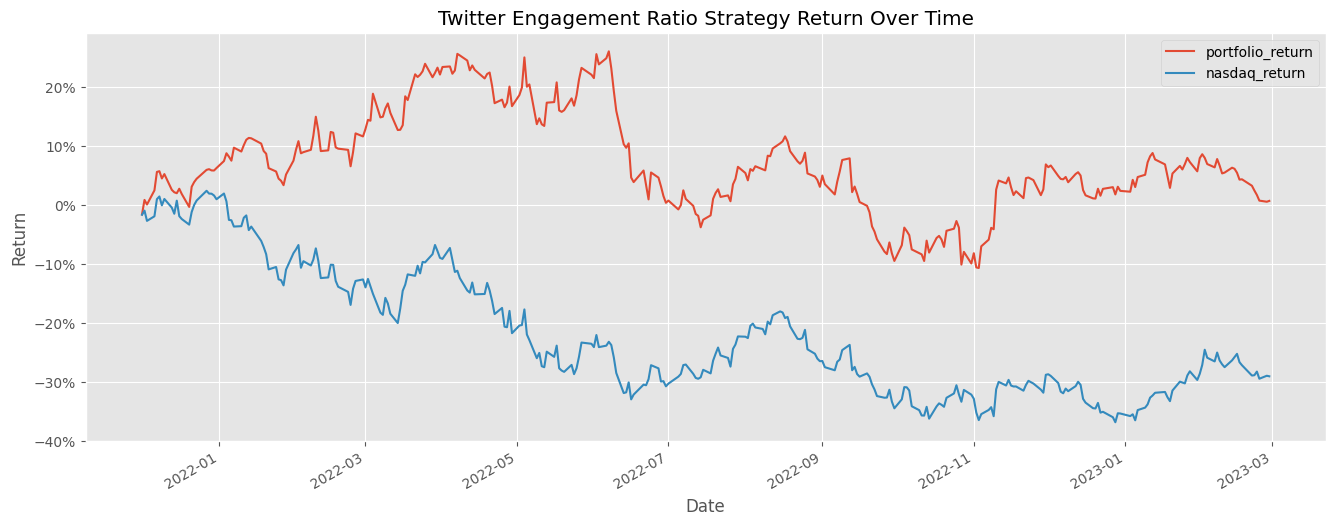

In [ ]:
portfolios_cumulative_return = np.exp(np.log1p(portfolio_df).cumsum()).sub(1)

portfolios_cumulative_return.plot(figsize=(16,6))

plt.title('Twitter Engagement Ratio Strategy Return Over Time')

plt.gca().yaxis.set_major_formatter(mtick.PercentFormatter(1))

plt.ylabel('Return')

plt.show()